# Linear Regression: Advertising Data

In [1]:
# allow plots to appear directly in the notebook
%matplotlib inline
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

Read data into a DataFrame

In [2]:
# data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Visualize the relationship between the features and the response using scatterplots

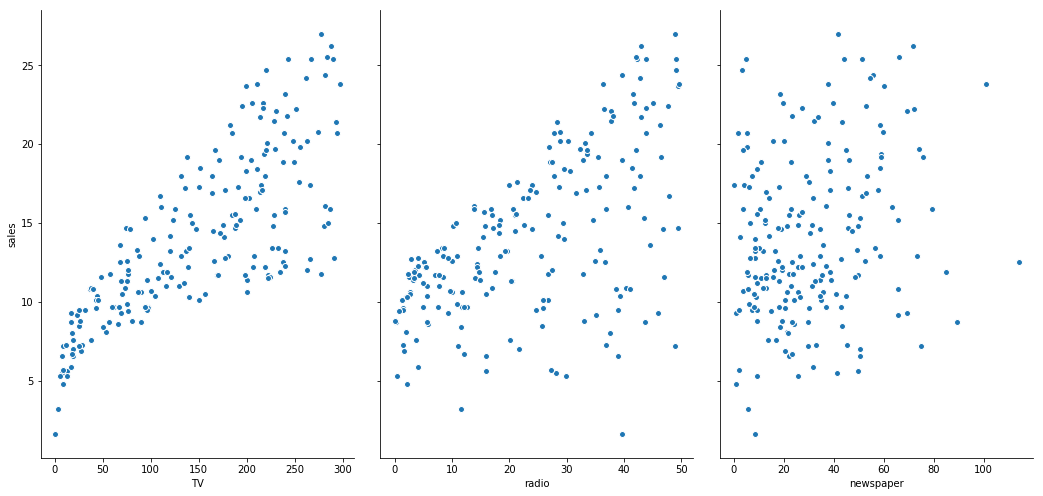

In [3]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7)

## Questions about advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

 
What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)


### Estimate the model coefficients for the advertising data

** Stats models **

In [4]:
# create a fitted model
lm1 = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

**SCIKIT-LEARN**

In [5]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.03259354913
[ 0.04753664]


## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

**A. Manual prediction**

In [6]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

** B. Statsmodels Prediction**

In [7]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(X_new)

0    9.409426
dtype: float64

**C. Scikit-learn Prediction**

In [8]:
# predict for a new observation
lm2.predict(50)

array([ 9.40942557])

Thus, we would predict sales of **9,409 widgets **in that market.

## Plotting the Least Squares Line

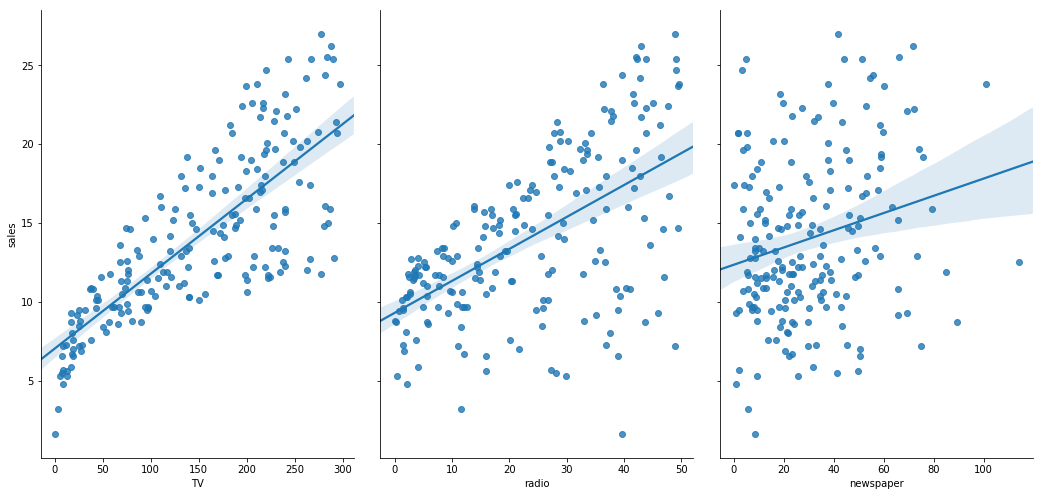

In [9]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

http://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

--------------------------------

# Multiple Linear Regression

### Predict Shanghai GDP base don economic data

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
data = pd.read_csv('Multiple Linear Regression.csv')
data.head()

,year,staff_wage_mean,shanghai_GDP,fixed_asset_investment,cpi,house_area,house_popula_mean
0,1978,672,272.81,27.91,100.0,234.03,3.77
1,1979,784,286.43,35.58,100.9,564.62,3.82
2,1980,873,311.89,45.43,106.9,607.91,3.77
3,1981,870,324.76,54.60,108.3,649.93,3.70
4,1982,883,337.07,71.34,108.7,684.61,3.67


In [12]:
data.tail()

,year,staff_wage_mean,shanghai_GDP,fixed_asset_investment,cpi,house_area,house_popula_mean
33,2011,51968,19195.69,5067.09,676.7,5984.74,2.72
34,2012,56300,20181.72,5254.38,695.9,6476.07,2.72
35,2013,60435,21818.15,5647.79,711.9,6274.25,2.72
36,2014,65417,23567.70,6016.43,730.7,7580.77,2.70
37,2015,71268,25123.45,6352.70,748.4,7258.69,2.69


In [13]:
data.drop(['year'], axis = 1).describe()

,staff_wage_mean,shanghai_GDP,fixed_asset_investment,cpi,house_area,house_popula_mean
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,18997.657895,6507.400789,2120.031053,407.578947,2812.162632,3.034737
std,21045.624730,7648.870836,2116.264094,227.130758,2440.915147,0.373904
min,672.000000,272.810000,27.910000,100.000000,234.030000,2.690000
25%,1989.000000,571.170000,193.415000,154.700000,804.360000,2.750000
50%,11044.000000,3198.170000,1863.195000,518.650000,1667.640000,2.840000
75%,28882.500000,10241.095000,3829.455000,572.475000,5702.160000,3.267500
max,71268.000000,25123.450000,6352.700000,748.400000,7580.770000,3.820000


View the relationship between the feature and the target

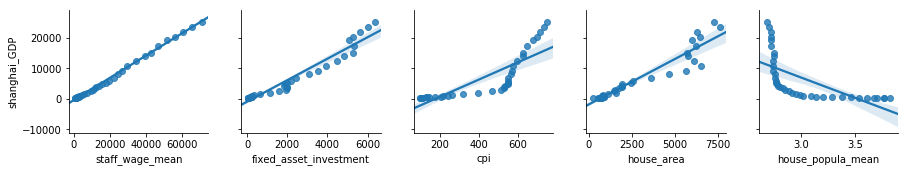

In [14]:
feature = [x for x in data.columns if x not in ['year', 'shanghai_GDP']]
target = ['shanghai_GDP']
g = sns.pairplot(data.drop(['year'], axis = 1), kind="reg",  x_vars= feature, y_vars=target)

Divide the data set into train sets and test sets.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[feature], data[target], test_size=0.25, random_state=27)

Fit train sets and predict test sets and measure the error between the predicted value and the true value.
    - Loss of application Residual sum of squares(RSS) and R_squares(R^{2} ).

In [16]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
RSS = np.mean((pred - y_test) ** 2)
R_squares = lr.score(X_test, y_test)

print('Coefficients:\n', lr.coef_)
print('')
print('intercept:', lr.intercept_)
print('')
print("Residual sum of squares: %.2f" % RSS)
print('')
print('Variance score: %.2f' % R_squares)

Coefficients:
 [[  3.56891902e-01   6.14236796e-01  -4.96668092e+00  -1.11850146e-01
   -2.46190630e+02]]

intercept: [ 1481.06549865]

Residual sum of squares: 38328.17

Variance score: 1.00


**Plot graph to view prediction vs. actual values**

Text(0,0.5,'Shanghai GDP')

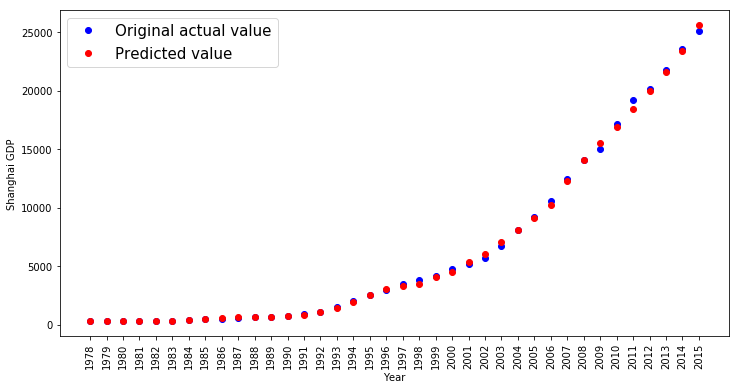

In [17]:
plt.figure(figsize=(12,6))
plt.plot(range(len(data)),data.shanghai_GDP,'bo', label="Original actual value")  
plt.plot(range(len(data)),lr.predict(data[feature]),'ro',label="Predicted value")  
plt.legend(loc="best", fontsize=15)
plt.xticks(range(0,38), range(1978,2016), rotation='vertical')  
plt.xlabel('Year')
plt.ylabel("Shanghai GDP")  

Text(0,0.5,'Shanghai GDP')

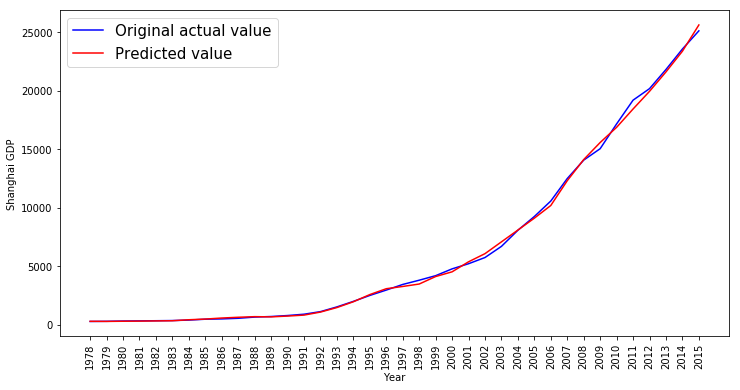

In [18]:
plt.figure(figsize=(12,6))
plt.plot(range(len(data)),data.shanghai_GDP,'b', label="Original actual value")  
plt.plot(range(len(data)),lr.predict(data[feature]),'r',label="Predicted value")  
plt.legend(loc="best", fontsize=15)
plt.xticks(range(0,38), range(1978,2016), rotation='vertical')  
plt.xlabel('Year')
plt.ylabel("Shanghai GDP")  

The above red line indicates the connection of the predicted points.

---